# The Lego Collector's Dilemma  

## Problem statement

You are a die hard Lego enthusiast wishing to collect as many board sets as you can. But before that you wish to be able to predict the price of a new lego product before its price is revealed so that you can budget it from your revenue. Since (luckily!), you are a data scientist in the making, you wished to solve this problem yourself. This dataset contains information on lego sets scraped from lego.com. Each observation is a different lego set with various features like how many pieces in the set, rating for the set, number of reviews per set etc. Your aim is to build a linear regression model to predict the price of a set.


## About the Dataset:
The snapshot of the data, you will be working on :

![Dataset](../images/lego_data.PNG)

You can see that some of the features of `review_difficulty`, `theme_name` and `Country Name` in the data are textual in nature. Don't worry, we have made things simple for you with some behind-the-scenes data preprocessing.  We have also modified the feature of `age`. You will be learning about all these preprocessing techinques in a later concept. For now let us concentrate on getting those Lego sets in your hands soon. :) 

![Dataset](../images/new_le.png)


The dataset has details of 9910 lego sets with the following 10 features

|Feature|Description|
|-----|-----|
|age|Which age categories it belongs to|
|list_price|price of the set (in $)|
|num_reviews|number of reviews per set|
|piece_count| number of pieces in that lego set|
|play_star_rating|ratings|
|review_difficulty|difficulty level of the set|
|star_rating|ratings|
|theme_name|which theme it belongs|
|val_star_rating|ratings|
|country|country name|










## 1. Aim: 
### Build a *Linear Regression* model to *predict the price* of a set using the given data containing *10 features* .

## 2. Importing Our dataset

In [6]:
# Let's start with import some libraries that we're definitely going to need
import numpy as np                                     # to simplify the math (e.g matrix opertaions etc)
import pandas as pd                                    # for data handling and manipulation
import matplotlib.pyplot as plt                        # Data visualisation and graph plotting
from sklearn.cross_validation import train_test_split  # for splitting raw data training and testing sets


### Use pandas to read the csv file from our directory <"../data/lego_final.csv">

In [13]:
data = pd.read_csv("../data/lego_final.csv")
data.describe()    # important info about the data -> should be analysed before proceeding with the data 

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,3.917698,20.523367,3.609844,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,1.603276,11.990176,1.614694,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000


### => note that the count of all the feature is equal (12261) , indicating no missing data. 

## * Task: Separate the features(X) and the depend variables (y) form the data
## * Task: Split the data into training and testing data
### Hint:
* Use `X_tr,X_te,y_tra,y_te=train_test_split(X,y ,test_size=0.25, random_state=42)` to split the data into train and test sets.

In [27]:
# store features
X = data.drop('list_price',axis=1)

# store dependent variable
y = data['list_price']

# spliting the dataset
X_tr,X_te,y_tra,y_te=train_test_split(X,y ,test_size=0.25, random_state=42)  # =>test set size 25% of the total data,=> tr - train; te- test  

### 2. It is very important to be able to look at the data and point out things of interest. That is why data visualization is one of the most important parts of data analysis (or preprocessing)

## Let's look for any correlation between each pair of features in a pairgrid of graphs
## Task: Plot the pairgrid of graphs of the features
### Hint:
* Use  `the pairplot`function from the library`seaborn ` to plot the pairgrid.

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
ages,1.000000,-0.165619,-0.092821,0.233386,-0.243746,0.101989,0.484460,0.112053,-0.007250
num_reviews,-0.165619,1.000000,0.544515,0.146788,-0.193509,0.159706,0.011412,0.171706,-0.003704
piece_count,-0.092821,0.544515,1.000000,0.163742,-0.305151,0.174711,0.165145,0.184208,0.001048
play_star_rating,0.233386,0.146788,0.163742,1.000000,-0.665974,0.899848,0.153613,0.922041,0.000585
review_difficulty,-0.243746,-0.193509,-0.305151,-0.665974,1.000000,-0.630829,-0.155144,-0.646337,-0.009994
star_rating,0.101989,0.159706,0.174711,0.899848,-0.630829,1.000000,0.066091,0.906091,0.001738
theme_name,0.484460,0.011412,0.165145,0.153613,-0.155144,0.066091,1.000000,0.092740,0.002139
val_star_rating,0.112053,0.171706,0.184208,0.922041,-0.646337,0.906091,0.092740,1.000000,-0.000238
country,-0.007250,-0.003704,0.001048,0.000585,-0.009994,0.001738,0.002139,-0.000238,1.000000


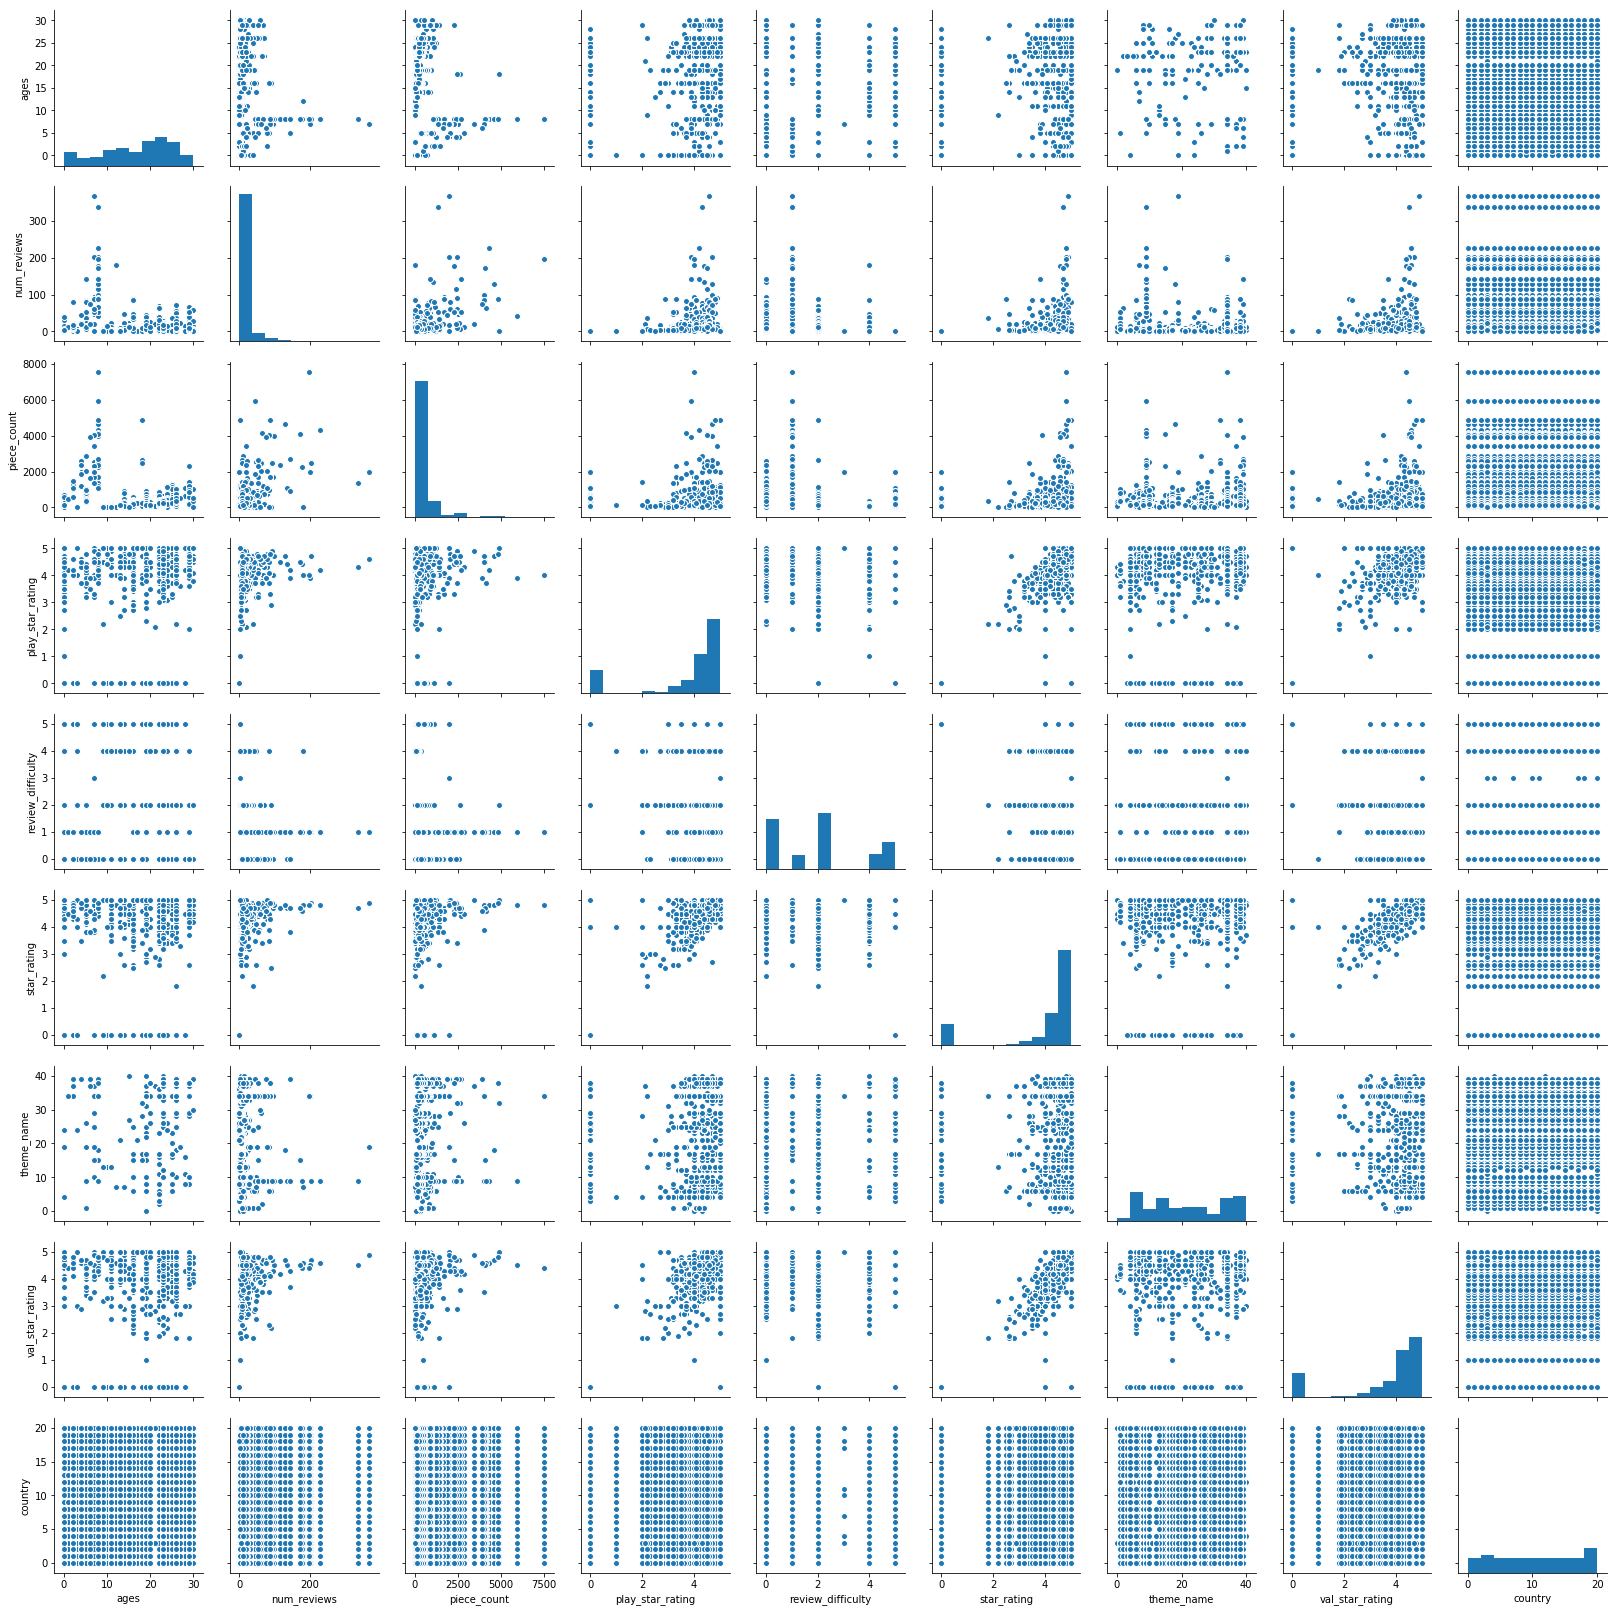

In [22]:
#plot the pairgrid
import seaborn as sns
sns.pairplot(X)


### => *star_rating* and *val_star_rating* and *play_star_rating* seem to have a bit of linear correlation with each other , which kind of makes sense as they are all ratings

## Task: Let's evaluate those correlation values to validate our observations

## Hint:
* Use `X_train.corr` to get a dataframe of correlations.

In [21]:
corr = X_tr.corr() # store correlations 
corr

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
ages,1.000000,-0.165619,-0.092821,0.233386,-0.243746,0.101989,0.484460,0.112053,-0.007250
num_reviews,-0.165619,1.000000,0.544515,0.146788,-0.193509,0.159706,0.011412,0.171706,-0.003704
piece_count,-0.092821,0.544515,1.000000,0.163742,-0.305151,0.174711,0.165145,0.184208,0.001048
play_star_rating,0.233386,0.146788,0.163742,1.000000,-0.665974,0.899848,0.153613,0.922041,0.000585
review_difficulty,-0.243746,-0.193509,-0.305151,-0.665974,1.000000,-0.630829,-0.155144,-0.646337,-0.009994
star_rating,0.101989,0.159706,0.174711,0.899848,-0.630829,1.000000,0.066091,0.906091,0.001738
theme_name,0.484460,0.011412,0.165145,0.153613,-0.155144,0.066091,1.000000,0.092740,0.002139
val_star_rating,0.112053,0.171706,0.184208,0.922041,-0.646337,0.906091,0.092740,1.000000,-0.000238
country,-0.007250,-0.003704,0.001048,0.000585,-0.009994,0.001738,0.002139,-0.000238,1.000000


### => Have a look at the correlation between *val_star_rating* and *star_ratings* and play_star_ratings*. Pretty high.  

* Such highly correlated features invite redundancies to our data. 

## Task:  Remove 'play_star_rating' and 'val_star_rating' as thier correlation values with *star_ratings* and each other are very high. 

* Among the remaining corr values the highest is 0.666 which is tolerable

### Hint :
* Use `*dataframe*.drop(['*column_name*'], 1 ,inplace=True)` to remove the column.

In [28]:
X_tr.drop(['play_star_rating','val_star_rating'], 1 ,inplace=True)
X_te.drop(['play_star_rating','val_star_rating'], 1 ,inplace=True)


C:\Users\Purvesh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
X_tr.head()  # check if done

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
9429,7,0,1967,5,0.0,34,14
3613,19,7,289,2,4.1,17,4
8062,11,2,15,4,5.0,13,12
3646,13,2,95,2,3.0,21,4
9320,29,6,914,0,4.8,38,14


## 3. Now we will get to the linear regression part. We will use SKLearn.linear_model .
## Task: Fit the linear model on the training and predict the y values for X_te.
## Task: Find the *mean squared error* and *R^2* values

 * Lesser the MSE better the fit.  https://en.wikipedia.org/wiki/Mean_squared_error
 * R value (like correlation) gives the measure of linearity of our model  https://en.wikipedia.org/wiki/Coefficient_of_determination

## Hint:
* fit the model as `LinearRegression().fit(X_tr, y_tra)`
* Save predicted values in `y_pred = LinearRegression().predict(X_te)` 
* `mse = men_squared_error(y_pred, y_te) ` mean squared error
* `r2 = r2_score(y_te, y_pred)` r^2 value

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Code starts here

#linear regression model
regressor=LinearRegression()

# fit the model
regressor.fit(X_tr,y_tra)

# predict the result
y_pred =regressor.predict(X_te)

# Calculate mse
mse = mean_squared_error(y_te, y_pred)

# print mse
print(mse)

# Calculate r2_score
r2 = r2_score(y_te, y_pred)

#print r2
print(r2)


1921.7564106373381
0.7768425546096461


## 4. Task: plotting the residual histogram

### Hint:
* Use residual = (y_te - y_pred) to calculate the residual.
* plt.hist(residual, bins=30

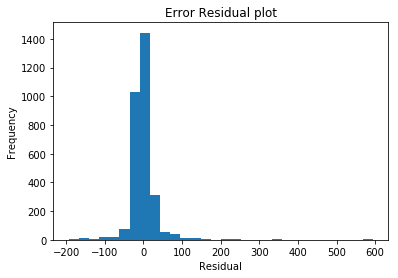

In [36]:
# calculate the residual
residual = (y_te - y_pred)

# plot the figure for residual
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")   
plt.title("Error Residual plot")
plt.show()

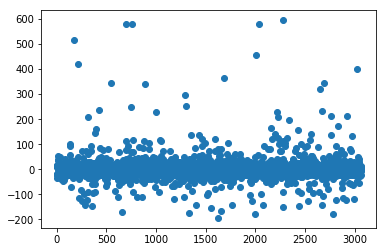

In [38]:
# plot a scatter plot of the residual values v/s observations
plt.scatter([range(len(residual))], residual)

## Interpretation:
* the residual distribution(second plot), is much random, indicating a good linear model
* the normal distributon of the Histogram about zero indicates a good fit as a most are correctly predicted(tallest at 0) almost equal no, of residue are +ve and -ve
* you could also see some outliers having a relatively higher residue